In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.optimize as opt
import scipy.special as special
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
import plotly.figure_factory as ff


In [2]:
"""
General case: computing log likelihood
We first describe the general case of computing the log likelihood of a sensory parameter θ
that is encoded by the activity of N neurons. Each neuron’s tuning function is described by
Φi(θ,S) where S represents the stimulus strength (e.g. contrast for gratings or coherence for
random–dot motion) and fires ni spikes in response to the stimulus. The average number of
spikes elicited is determined by the neuron’s mean firing rate (from the tuning function)
multiplied by the stimulation time, t, and is subject to Poisson noise (equation (1)). Neurons
are assumed to be statistically independent (equation (2)). Equation (3) describes the form
of the log likelihood:

$\begin{aligned} & p\left(n_i \mid \theta\right)=\frac{\left(\Phi_i(\theta, S) \cdot t\right)^{n_i}}{n_{i} !} e^{-\Phi_i(\theta, S) t} \\ & p\left(n_1, n_2, n_3, \ldots, n_N \mid \theta\right)=\prod_{i=1}^N p\left(n_i \mid \theta\right) \\ & \log L(\theta)=\sum_{i=1}^N n_i \log \Phi_i(\theta, S)-t \sum_{i=1}^N \Phi_i(\theta, S)-\sum_{i=1}^N \log \left(n_{i} !\right)+\log (t) \sum_{i=1}^N n_i\end{aligned}$

Explain me this by step by step with giving the latex markdown formulas
"""

"""The last two terms on the right hand side (RHS) are clearly independent of θ and can be
dropped. The second term on the RHS is a sum over all tuning curves for a given stimulus.
For a homogeneous sensory representation, this term will generally sum to a constant and
would therefore be independent of θ. Dropping these terms:
\log L(\theta)=\sum_{i=1}^N n_i \log \Phi_i(\theta, S)
If the stimulus strength only scales the profile of the tuning curves and does not change
their shape, Φi(θ,S) can be written as a product of two functions ƒi(θ) and g(S) and the log
likelihood (after removing terms that are independent of θ) becomes:
$\log L(\theta)=\sum_{i=1}^N n_i \log f_i(\theta)$
    """

'The last two terms on the right hand side (RHS) are clearly independent of θ and can be\ndropped. The second term on the RHS is a sum over all tuning curves for a given stimulus.\nFor a homogeneous sensory representation, this term will generally sum to a constant and\nwould therefore be independent of θ. Dropping these terms:\n\\log L(\theta)=\\sum_{i=1}^N n_i \\log \\Phi_i(\theta, S)\nIf the stimulus strength only scales the profile of the tuning curves and does not change\ntheir shape, Φi(θ,S) can be written as a product of two functions ƒi(θ) and g(S) and the log\nlikelihood (after removing terms that are independent of θ) becomes:\n$\\log L(\theta)=\\sum_{i=1}^N n_i \\log f_i(\theta)$\n    '

In [3]:
""" Figure 1 Computing the log likelihood function in a feedforward network. At
its input (bottom), a stimulus, elicits n1, n2, y , nN spikes in the sensory
representation. The response of each neuron multiplied by the logarithm of
its own tuning curve, log[fi], gives the contribution of that neuron to the log
likelihood function. Adding the contribution of individual neurons (shown
for two example stimulus values in orange and green) gives the overall log
likelihood function, log L(y) for all values of y that could have elicited this
pattern of responses. Here, the orange point at the peak of the log likelihood
function indicates the most likely stimulus.
"""

' Figure 1 Computing the log likelihood function in a feedforward network. At\nits input (bottom), a stimulus, elicits n1, n2, y , nN spikes in the sensory\nrepresentation. The response of each neuron multiplied by the logarithm of\nits own tuning curve, log[fi], gives the contribution of that neuron to the log\nlikelihood function. Adding the contribution of individual neurons (shown\nfor two example stimulus values in orange and green) gives the overall log\nlikelihood function, log L(y) for all values of y that could have elicited this\npattern of responses. Here, the orange point at the peak of the log likelihood\nfunction indicates the most likely stimulus.\n'

$\begin{aligned} & p\left(n_i \mid \theta\right)=\frac{\left(\Phi_i(\theta, S) \cdot t\right)^{n_i}}{n_{i} !} e^{-\Phi_i(\theta, S) t} \\ & p\left(n_1, n_2, n_3, \ldots, n_N \mid \theta\right)=\prod_{i=1}^N p\left(n_i \mid \theta\right) \\ & \log L(\theta)=\sum_{i=1}^N n_i \log \Phi_i(\theta, S)-t \sum_{i=1}^N \Phi_i(\theta, S)-\sum_{i=1}^N \log \left(n_{i} !\right)+\log (t) \sum_{i=1}^N n_i\end{aligned}$

$\log L(\theta)=\sum_{i=1}^N n_i \log f_i(\theta)$

After seperating $\Phi_i(\theta, S)$ as a combined function of $fi(\theta)$ and $g(S)$

$\log L(\theta)=\sum_{i=1}^N n_i \log f_i(\theta)$


# 1 - Single Neuron Activation 
## 1.1 - Single Neuron Activation with a neuron only have single random spike count

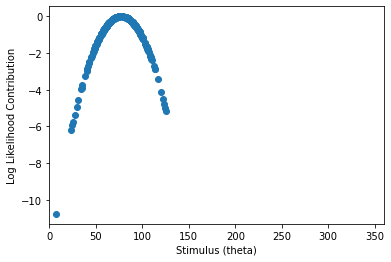

In [4]:
def simple_tuning_curve(theta, n_i):
    # n_i is the number of spikes observed for neuron i
    # theta is the stimulus value
    # tuning curve is a gaussian with mean 90(preferred_dir) and std 20 (tuning_width)
    tuning_width=40
    return np.log(np.exp(-(theta-preferred_dir)**2/(2*tuning_width**2)))*n_i
    #return n_i*
num_of_neurons=360
spike_counts = np.random.randint(1,10)
preferred_dir=np.random.randint(1,360)
stimulus_range = np.random.normal(preferred_dir,20,num_of_neurons)

log_likelihood_contributions_single=[]
for theta in stimulus_range:
    log_likelihood_contributions_single.append(simple_tuning_curve(theta,spike_counts))

#plt.plot(stimulus_range,a)
# plot a histogram of log likelihood contributions of a single neuron
#
plt.plot(stimulus_range,log_likelihood_contributions_single,'o')
plt.xlabel('Stimulus (theta)')
plt.ylabel('Log Likelihood Contribution')
plt.xlim(0,360)
plt.show()

#plt.plot(stimulus_range,log_likelihood_contributions_single,'o')


## 1.2 - Single Neuron Activation with a range of stimulus values

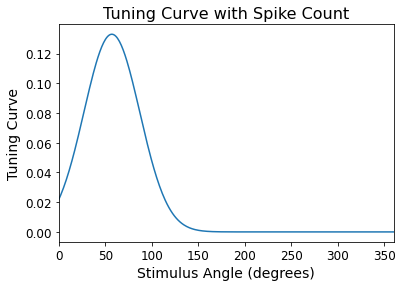

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def tuning_function(theta, preferred_angle, tuning_width, spike_count):
    return spike_count * np.exp(-0.5 * ((theta - preferred_angle) / tuning_width)**2) / (tuning_width * np.sqrt(2 * np.pi))

stimulus_range = np.linspace(0, 360, 360)

preferred_angle = np.random.randint(1,360)
tuning_width = 30
spike_count = 10  # Example spike count for illustration purposes

tuning_curve = tuning_function(stimulus_range, preferred_angle, tuning_width, spike_count)

plt.plot(stimulus_range, tuning_curve)
# aesthetics
plt.xlim(0,360)
plt.xlabel('Stimulus Angle (degrees)', fontsize=14)
plt.ylabel('Tuning Curve',  fontsize=14)
plt.title('Tuning Curve with Spike Count', fontsize=16)
# tick sizes
plt.tick_params(axis='both', which='major', labelsize=12)



plt.show()


## 1.3 - Single Neuron Activation by also considering random spike counts for each stimulus

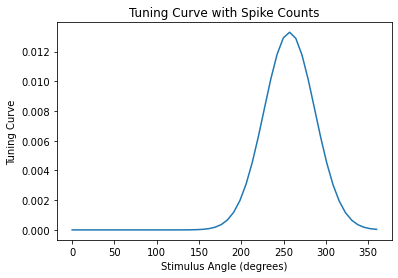

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def tuning_function(theta, preferred_angle, tuning_width):
    return  np.exp(-0.5 * ((theta - preferred_angle) / tuning_width)**2) / (tuning_width * np.sqrt(2 * np.pi))

stimulus_range = np.linspace(0, 360, 50)

preferred_angle =  np.random.randint(0,360)
tuning_width = 30
spike_counts = np.random.randint(0, 10, size=len(stimulus_range))  # Example spike counts for each stimulus angle

tuning_curve = tuning_function(stimulus_range, preferred_angle, tuning_width)
plt.plot(stimulus_range, tuning_curve)
#smoothing the curve
from scipy.ndimage import gaussian_filter1d

plt.xlabel('Stimulus Angle (degrees)')
plt.ylabel('Tuning Curve')
plt.title('Tuning Curve with Spike Counts')
plt.show()



#### Log-likelihood

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def log_likelihood(theta, preferred_angle, tuning_width, spike_counts):
    tuning_curve = spike_counts * np.exp(-0.5 * ((theta - preferred_angle) / tuning_width)**2) / (tuning_width * np.sqrt(2 * np.pi))
    log_likelihood = np.sum(np.log(tuning_curve + 1e-10))  # Adding a small offset to avoid logarithm of zero
    return log_likelihood



stimulus_range = np.linspace(0, 360, 360)

preferred_angle = np.random.randint(0,360)
tuning_width = np.random.randint(1, 20)
spike_counts = np.random.randint(0, 10, size=len(stimulus_range))  # Example spike counts for each stimulus angle

log_likelihood_values = np.zeros_like(stimulus_range)

for i, theta in enumerate(stimulus_range):
    log_likelihood_values[i] = log_likelihood(theta, preferred_angle, tuning_width, spike_counts)

# plt.plot(stimulus_range, log_likelihood_values)
# plt.xlabel('Stimulus Angle (degrees)')
# plt.ylabel('Log Likelihood')
# plt.title('Log Likelihood of Neuron Response')
# plt.show()

# plot it using plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=stimulus_range, y=log_likelihood_values))
fig.update_layout(title='Log Likelihood of Neuron Response',
                     xaxis_title='Stimulus Angle (degrees)',
                        yaxis_title='Log Likelihood',
                        # background 
                        template='plotly_white',
                        width=700,
                        height=500)
fig.show()


# 2 - Example case: decoding motion from MT responses

In [8]:
    """
    Example case: decoding motion from MT responses
The encoding model of direction tuned neurons in area MT consists of N similar neurons
with uniformly distributed preferred directions, θi. The tuning functions of the neurons are
self–similar and have a circular Gaussian (von Mises) profile, ƒi(θ) with concentration
parameter κ. The mean firing rate of neurons in the model approximates the response of
MT neurons to random–dot stimuli where the percentage of coherently moving dots
(coherence, C) measures the signal strength. Rmax is the maximum mean firing rate of the
cells in response to a fully coherent stimulus (C=1), and ni is the number of spikes elicited in
response to the stimulus and is described by Poisson statistics with a mean that is derived
from the coherence of the stimulus, the tuning of the cell, ƒi(θ) and the stimulation time, t.
The neurons are assumed to have pairwise correlations with correlation coefficient ρij.
Neurons preferring the same direction are maximally correlated (correlation coefficient ρmax)
and the strength of pairwise correlations monotonically decreases as the preferred
directions of the neurons become more different; a circular Gaussian form with
concentration parameter δ describes the profile of pairwise correlations (Fig. S1).
    """

'\nExample case: decoding motion from MT responses\nThe encoding model of direction tuned neurons in area MT consists of N similar neurons\nwith uniformly distributed preferred directions, θi. The tuning functions of the neurons are\nself–similar and have a circular Gaussian (von Mises) profile, ƒi(θ) with concentration\nparameter κ. The mean firing rate of neurons in the model approximates the response of\nMT neurons to random–dot stimuli where the percentage of coherently moving dots\n(coherence, C) measures the signal strength. Rmax is the maximum mean firing rate of the\ncells in response to a fully coherent stimulus (C=1), and ni is the number of spikes elicited in\nresponse to the stimulus and is described by Poisson statistics with a mean that is derived\nfrom the coherence of the stimulus, the tuning of the cell, ƒi(θ) and the stimulation time, t.\nThe neurons are assumed to have pairwise correlations with correlation coefficient ρij.\nNeurons preferring the same direction are 

### Params
$K=3$\
$N=720$

### Weights
$ n_i=CellWeight=\cos (   \theta  - \theta_i)  $

### Tuning of Cell
$f_i(\theta)=\exp [K \left(  \cos (   \theta  - {  \theta    }_{ i  }     )  -1  \right)  ] $


### Firing Rates Log Likelihood Ratio

$ \log({ L_ \theta    }) = \displaystyle\sum_{ i =  1  }^{ N  } n_i \cdot Logfi(\theta) = \displaystyle\sum_{ i =  1  }^{ N  } n_i \cdot \cos(\theta-\theta_i)  $




In [32]:
kappa=3
N=720
Rmax=60
Rmin=10
# n_i = spikes in response to stimulus
# theta = stimulus angle
# theta_i = preferred angle
# kappa = tuning width

def cell_weight(theta,preferred_angle):
    return np.cos(np.deg2rad(theta-preferred_angle))

def tuning_function(theta, preferred_angle, kappa):
    return np.exp(kappa *((cell_weight(theta,preferred_angle)- 1)))

def log_likelihood(theta, preferred_angle, kappa):
    fi =tuning_function(theta, preferred_angle, kappa)
    #return np.sum(tuning_function(theta,preferred_angle,kappa)* np.cos(np.deg2rad(theta-preferred_angle)))
    return np.sum(fi* np.cos(np.deg2rad(theta-preferred_angle)))
    #return np.sum(np.cos(np.deg2rad(theta-preferred_angle)))
    #return np.sum(fi*cell_weight(theta,preferred_angle))

def log_likelihood_fi(theta, preferred_angle, kappa):
    fi =tuning_function(theta, preferred_angle, kappa)
    return np.sum(np.log(fi))#*cell_weight(theta,preferred_angle))
def log_likelihood_rivalry(theta1,theta2, preferred_angle, kappa):
    fi =tuning_function(theta1, preferred_angle, kappa)
    fj =tuning_function(theta2, preferred_angle, kappa)
    weight1=np.cos(np.deg2rad(theta1-preferred_angle))
    weight2=np.cos(np.deg2rad(theta2-preferred_angle))
    overall_log= np.sum((fi)* (np.cos(np.deg2rad(theta1-preferred_angle)-np.cos(np.deg2rad(theta2-preferred_angle)))))
    loga=np.sum(fi*np.cos(np.deg2rad(theta1-preferred_angle)))
    logb=np.sum(fi*np.cos(np.deg2rad(theta2-preferred_angle)))
    return overall_log,weight1,weight2,fi,fj,loga,logb


In [42]:
# Define the parameters
max_angle = 360  # Number of neurons in the population
N = 720  # Number of neurons in the population
preferred_angles = np.linspace(0, max_angle, N)  # Preferred directions of the neurons
kappa = 3  # Concentration parameter for the tuning curves
stimulus_range = np.linspace(0, max_angle, N)


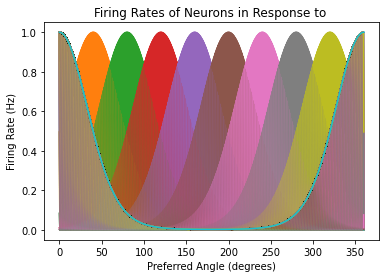

In [11]:
# calculate firing rates for each neuron in response to 90 degree theta
log_likelihoods = np.zeros_like(preferred_angles)
tuning_curve = np.zeros_like(preferred_angles)
stimulus=90
sample_of_stimuli_range=np.linspace(0,360,10)

for i in range(N):
    for stimulus in sample_of_stimuli_range:
        log_likelihoods[i] = log_likelihood(stimulus,preferred_angles[i],kappa)
        tuning_curve[i] = tuning_function(stimulus,preferred_angles[i],kappa)
        plt.plot(preferred_angles, tuning_curve)

plt.xlabel('Preferred Angle (degrees)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rates of Neurons in Response to ')
plt.show()


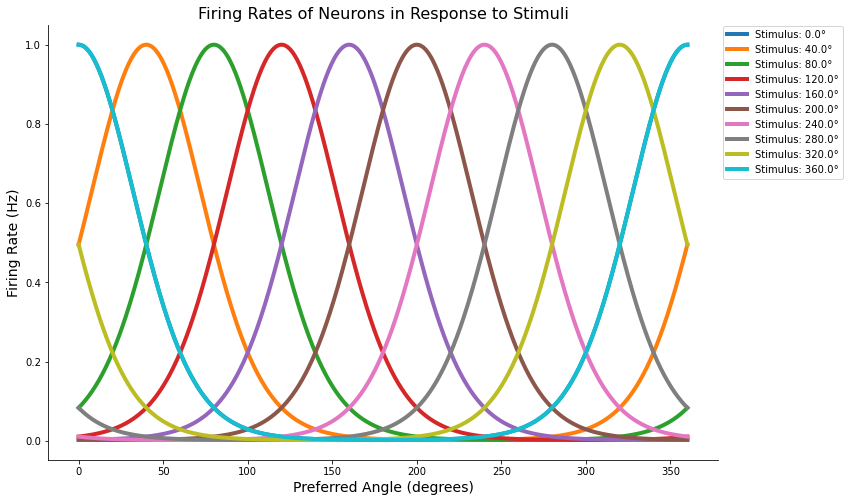

In [12]:
# Calculate firing rates for each neuron in response to each stimulus angle
log_likelihoods = np.zeros((len(sample_of_stimuli_range), N))
tuning_curves = np.zeros((len(sample_of_stimuli_range), N))
cell_weights = np.zeros((len(sample_of_stimuli_range), N))

for i,stimulus in enumerate(sample_of_stimuli_range):
    for j,neuron in enumerate(preferred_angles):
        tuning_curves[i,j]=tuning_function(stimulus,neuron,kappa)
        log_likelihoods[i,j]=log_likelihood(stimulus,neuron,kappa)
        cell_weights[i,j]=cell_weight(stimulus,neuron)
plt.figure(figsize=(12, 8))
# Plotting
for i, stimulus in enumerate(sample_of_stimuli_range):
    plt.plot(preferred_angles, tuning_curves[i, :], label=f'Stimulus: {stimulus}°', linewidth=4)
    #plt.fill_between(preferred_angles,  tuning_curves[i, :],alpha=0.47)

plt.xlabel('Preferred Angle (degrees)', fontsize=14)
plt.ylabel('Firing Rate (Hz)', fontsize=14)
plt.title('Firing Rates of Neurons in Response to Stimuli', fontsize=16)
sns.despine()
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

# figure caption
# The firing rates of neurons
# in response to different stimuli. The firing rates of neurons in response to different stimuli
# are shown in the top panel. The bottom panel shows the cosine of the difference between
# the preferred angle of the neuron and the stimulus angle. The cosine of the difference


In [13]:
# Plot using plotly
fig = go.Figure()
for i, stimulus in enumerate(sample_of_stimuli_range):
    #fig.add_trace(go.Scatter(x=preferred_angles, y=tuning_curves[i, :], name=f'Stimulus: {stimulus}°'))
    # fill area between traces
    fig.add_trace(go.Scatter(x=preferred_angles, y=tuning_curves[i, :],
                                fill='tozeroy',
                                mode='none',
                                name=f'Stimulus: {stimulus}°',
                                connectgaps=True,
                                # line width
                                ))
fig.update_layout(title='Firing Rates of Neurons in Response to Stimuli',
                        xaxis_title='Preferred Angle (degrees)',
                        yaxis_title='Firing Rate (Hz)',
                        # background
                        template='plotly_white',
                        width=1000,
                        height=600)
fig.show()



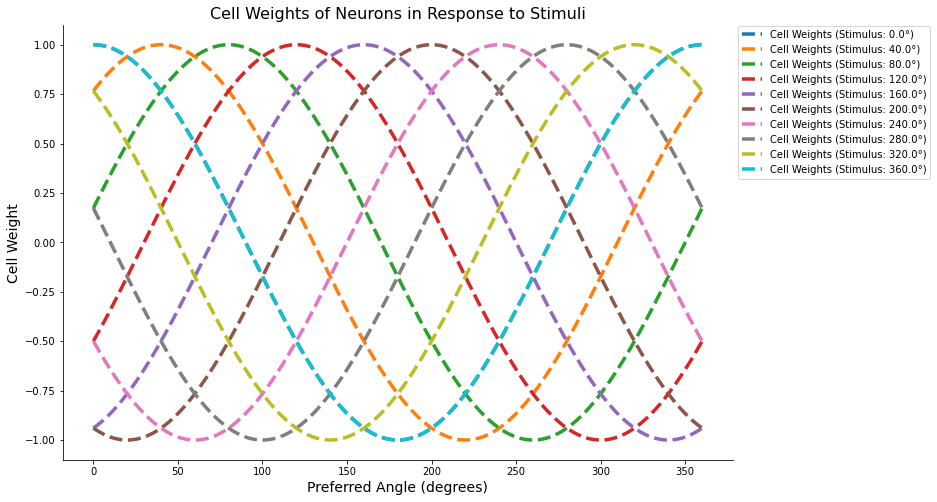

'\nFigure 1:  The cell weights of neurons in response to stimuli are plotted for 10 stimuli ranging from 0° to 360°. \nThe cell weights of neurons are calculated using the cosinusoidal function with the preferred angle and concentration parameter(Kappa) as\n parameters. \n '

In [14]:
plt.figure(figsize=(12, 8))
# Plotting
for i, stimulus in enumerate(sample_of_stimuli_range):
    plt.plot(preferred_angles, cell_weights[i, :], '--', label=f'Cell Weights (Stimulus: {stimulus}°)', linewidth=3.5)

plt.xlabel('Preferred Angle (degrees)', fontsize=14)
plt.ylabel('Cell Weight', fontsize=14)
plt.title('Cell Weights of Neurons in Response to Stimuli', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1.01))
sns.despine()
plt.show()
# figure caption
"""
Figure 1:  The cell weights of neurons in response to stimuli are plotted for 10 stimuli ranging from 0° to 360°. 
The cell weights of neurons are calculated using the cosinusoidal function with the preferred angle and concentration parameter(Kappa) as
 parameters. 
 """

In [15]:
cell_weights_singeStim*cell_tuning_singeStim

NameError: name 'cell_weights_singeStim' is not defined

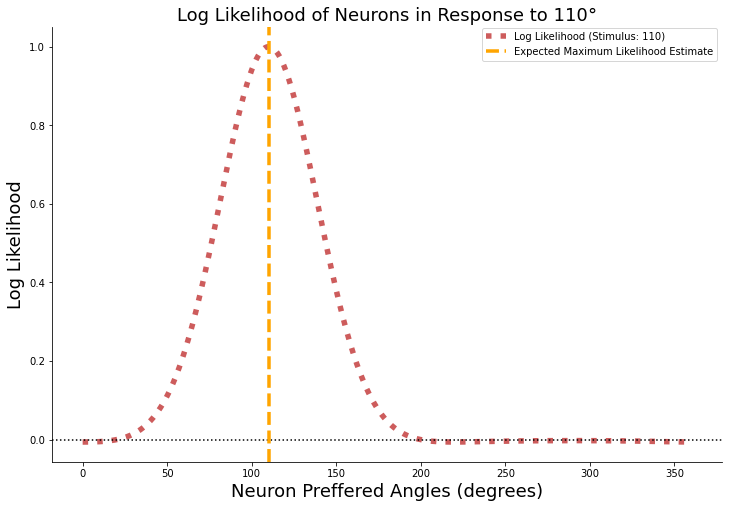

In [ ]:
# plot log likelihood of a single stimulus(180 degrees) on over all neurons
plt.figure(figsize=(12, 8))
# Plotting
stimulus=110
log_likelihoods_singeStim=[]
cell_weights_singeStim=[]
cell_tuning_singeStim=[]
for i in range(preferred_angles.shape[0]):
    cell_weights_singeStim.append(cell_weight(stimulus,preferred_angles[i]))
    cell_tuning_singeStim.append(tuning_function(stimulus,preferred_angles[i],kappa))
    log_likelihoods_singeStim.append(log_likelihood(stimulus,preferred_angles[i],kappa))
# plot
#plt.plot(preferred_angles, cell_weights_singeStim, '--', label=f'Cell Weights (Stimulus: 180°)', linewidth=2.5)
#plt.plot(preferred_angles, cell_tuning_singeStim, '--', label=f'Cell Tuning (Stimulus: 180°)', linewidth=2.5)
plt.plot(preferred_angles, log_likelihoods_singeStim,':', label=f'Log Likelihood (Stimulus: 110)',linewidth=5.5, color='indianred')

plt.xlabel('Neuron Preffered Angles (degrees)', fontsize=18)
plt.ylabel('Log Likelihood', fontsize=18)
plt.title('Log Likelihood of Neurons in Response to '+ str(stimulus)+'°', fontsize=18)
# add horizontal and vertical lines at 0
plt.axhline(y=0, color='k', linestyle=':', linewidth=1.5)
#The peak of the average likelihood function—the expected maximum-likelihood estimate of the stimulus direction—is shown as orange
plt.axvline(x=stimulus, color='orange', linestyle='--', linewidth=3.5, label='Expected Maximum Likelihood Estimate')

#plt.axvline(x=0, color='b', linestyle='--', linewidth=1.5)
plt.legend(bbox_to_anchor=(1, 1.01))
# add caption
#plt.text(0, -0.2, 'Figure 2.2: Log likelihood of neurons in response to '+ str(stimulus)+'°', fontsize=14, transform=plt.gcf().transFigure)
sns.despine()
plt.show()

# figure explanation
# The log likelihood of neurons in response to 180° stimulus is plotted. The peak of the average likelihood function—the expected maximum-likelihood estimate of the stimulus direction—is shown as orange dashed line.



In [ ]:

# plot with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=preferred_angles, y=log_likelihoods_singeStim,
                                name=f'Log Likelihood (Stimulus: {stimulus}°)',
                                connectgaps=True,
                                # line width
                                ))
fig.update_layout(title='Log Likelihood of Neurons in Response to '+ str(stimulus)+'°',
                        xaxis_title='Preferred Angle (degrees)',                    
                        yaxis_title='Log Likelihood',
                        # background
                        template='plotly_white',
                        width=1000,
                        height=600)
fig.show()



In [ ]:
n = 720
Rmax = 60
dprime = [0.4, 0.7, 1.4, 2.8]
criterions = np.linspace(Rmax, -Rmax, n)
fig = go.Figure()
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                                name="d' = 0",
                                connectgaps=True,
                                # line width
                                ))
for i in dprime:
    signal = np.random.normal(i, 1, n)
    noise = np.random.normal(0, 1, n)
    hit_rates = [(signal > c).mean() for c in criterions]
    fa_rates = [(noise > c).mean() for c in criterions]
    fig.add_trace(go.Scatter(x=fa_rates, y=hit_rates,
                                name=f"d' = {i}",
                                connectgaps=True,
                                # line width
                                ))
fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve',
                        xaxis_title='False Alarm Rate',
                        yaxis_title='Hit Rate', 
                        # background
                        template='plotly_white',
                        width=1000,
                        height=600)
fig.show()


### Diverging stimuli
![image.png](attachment:image.png)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


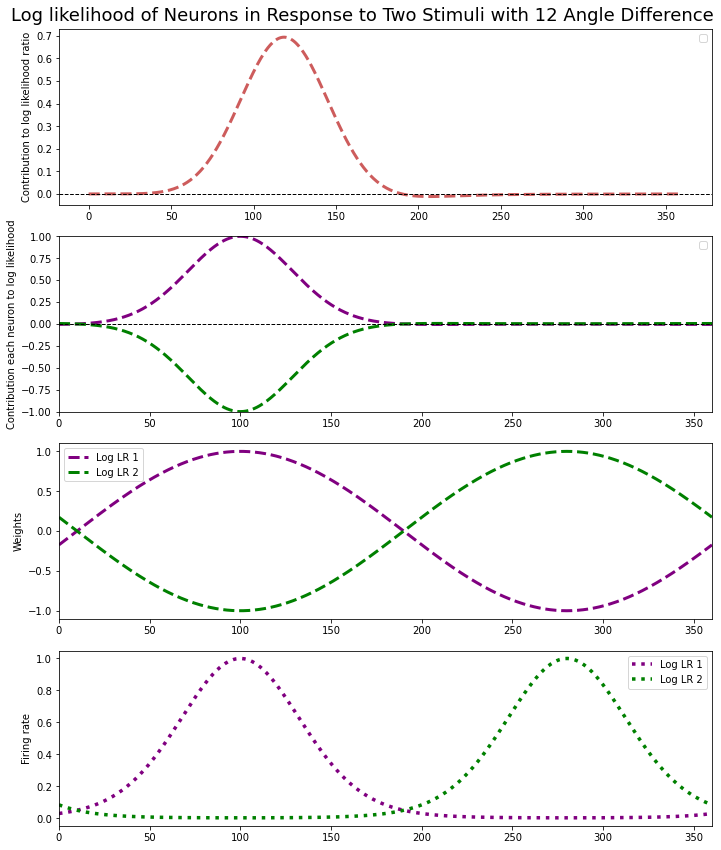

In [51]:
def single_stim_stats(stimulus,preferred_angles,kappa):
    log_likelihoods_singeStim = []
    cell_weights_singeStim=[]
    cell_tuning_singeStim=[]
    log_likelihoods_singeStim_fi=[]
    for i in range(preferred_angles.shape[0]):
        log_likelihoods_singeStim.append(log_likelihood(stimulus, preferred_angles[i], kappa))
        cell_weights_singeStim.append(cell_weight(stimulus,preferred_angles[i]))
        cell_tuning_singeStim.append(tuning_function(stimulus,preferred_angles[i],kappa))
        log_likelihoods_singeStim_fi.append(log_likelihood_fi(stimulus, preferred_angles[i], kappa))
    return log_likelihoods_singeStim, cell_weights_singeStim, cell_tuning_singeStim, log_likelihoods_singeStim_fi

def double_stim_stats(stim1,stim2,preferred_angles,kappa):
    log_likelihoods_doubleStim = []
    cell_weights_a=[]
    cell_weights_b=[]
    cell_tuning_a=[]
    cell_tuning_b=[]
    loga=[]
    logb=[]
    for i in range(preferred_angles.shape[0]):
        log_likelihoods_doubleStim.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[0])
        cell_weights_a.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[1])
        cell_weights_b.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[2])
        cell_tuning_a.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[3])
        cell_tuning_b.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[4])
        loga.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[5])
        logb.append(log_likelihood_rivalry(stim1,stim2, preferred_angles[i], kappa)[6])
    return log_likelihoods_doubleStim, cell_weights_a, cell_weights_b, cell_tuning_a, cell_tuning_b, loga, logb


log_likelihoods_doubleStim, cell_weights_a, cell_weights_b, cell_tuning_a, cell_tuning_b,loga,logb= double_stim_stats(100,280,preferred_angles,kappa)
# stimA_log,stimA_weights, stimA_tuning,stimA_log_fi =single_stim_stats(90,preferred_angles,kappa)
# stimB_log,stimB_weights,stimB_tuning,stimB_log_fi=single_stim_stats(90+12,preferred_angles,kappa)

#sitm0_log,stim0_weight,stim0_wtuning=single_stim_stats(0,preferred_angles,kappa)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
# general plot title
fig.suptitle('Log likelihood of Neurons in Response to Two Stimuli with 12 Angle Difference', fontsize=18)
# Panel 1: Neuron activity profiles
#neuron_activity = np.zeros(N)
#neuron_activity[np.argmax(cell_weight(stimulus, preferred_angles))] = 1
#neuron_activity=[stimA_log[i]-stimB_log[i] for i in range(len(stimA_log))]
axs[0].plot(preferred_angles, log_likelihoods_doubleStim, color='indianred', linestyle='dashed', linewidth=3)
#axs[0].set_xlim(0, 360)
#axs[0].set_ylim(0, 1)
#axs[0].set_ylabel('Log likelihood')
#add horizontal line
axs[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axs[0].set_ylabel('Contribution to log likelihood ratio')
axs[0].legend()
# Panel 2: Weighting profiles
weighting_profiles = cell_weight(stimulus, preferred_angles)
axs[1].plot(preferred_angles, loga, color='purple',linewidth=3, linestyle='--')
axs[1].plot(preferred_angles, logb, color='green',linewidth=3, linestyle='--')
# add horizontal line
axs[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axs[1].set_xlim(0, 360)
axs[1].set_ylim(-1, 1)
#axs[1].set_ylabel('Log likelihood')
axs[1].set_ylabel('Contribution each neuron to log likelihood')
axs[1].legend()
# Panel 3: Average contribution to log likelihoods

axs[2].plot(preferred_angles, cell_weights_a, label='Log LR 1', color='purple',linewidth=3, linestyle='--')
axs[2].plot(preferred_angles, cell_weights_b, label='Log LR 2', color='green',linewidth=3, linestyle='--')
axs[2].set_xlim(0, 360)
axs[2].set_ylabel('Weights')
#axs[2].set_title('Weights')
axs[2].legend()

# Panel 4: Average contribution to log likelihood ratio
#log_lr_ratio = np.array(stimA_tuning) - np.array(stimA_tuning)
axs[3].plot(preferred_angles, cell_tuning_a, ':',color='purple',linewidth=3.5)
axs[3].plot(preferred_angles, cell_tuning_b,':', color='green',linewidth=3.5)
axs[3].set_xlim(0, 360)
#axs[3].set_xlabel('Preferred Angle (degrees)')
axs[3].set_ylabel('Firing rate')
#axs[3].set_title('Average Contribution to Log Likelihood Ratio')
axs[3].legend(['Log LR 1', 'Log LR 2'])
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
#